In [1]:
import pandas as pd
data = pd.read_csv("../content/heart_small.csv")

In [2]:
from sklearn.model_selection import train_test_split
X = data.drop('heart disease', axis=1)
y = data['heart disease']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=1)

# AdaBoostClassifier
* The idea behind AdaBoost is that, by sequentially **focusing on the samples misclassified by previous weak learners**, the algorithm adapts to the characteristics of the data and improves its overall predictive power.
* The final ensemble prediction is usually a weighted majority vote or a weighted sum of the individual weak learners’ predictions.

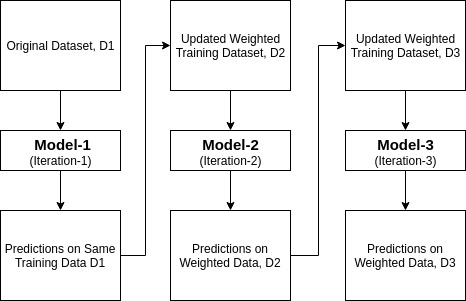

AdaBoost starts by training a weak learner (or stump) and adds more learners until there is an ensemble of weak learners.
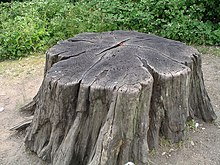

In [3]:
from sklearn.ensemble import AdaBoostClassifier

In [4]:
abc=AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)
abc.score(X_test,y_test)

0.6049382716049383

In [5]:
abc.get_params()

{'algorithm': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 1}

* algorithm {‘SAMME’}, default=’SAMME’ - clasical boosting algorithm
* estimator -  default=None
The base estimator from which the boosted ensemble is built. If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1.
* learning_rate - float, default=1.0
Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters. Values must be in the range (0.0, inf).
* n_estimators int, default=50
The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early. Values must be in the range [1, inf).

In [6]:
y_pred = abc.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred )

array([[28, 17],
       [15, 21]])

In [8]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.6049382716049383

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.62      0.64        45
           1       0.55      0.58      0.57        36

    accuracy                           0.60        81
   macro avg       0.60      0.60      0.60        81
weighted avg       0.61      0.60      0.61        81



/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


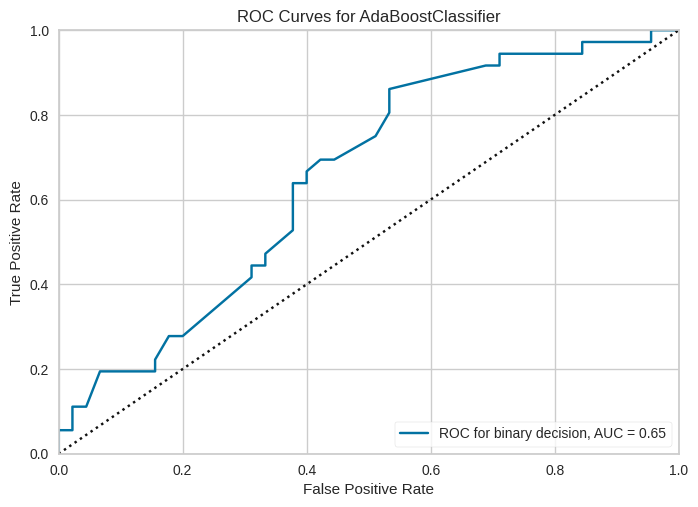

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [9]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(abc, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
}

In [12]:
from sklearn.model_selection import GridSearchCV

grid_search_ada = GridSearchCV(abc, param_grid, cv=5)
grid_search_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=1),
                                       DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150]})

In [13]:
grid_search_ada.best_params_

{'estimator': DecisionTreeClassifier(max_depth=1),
 'learning_rate': 0.1,
 'n_estimators': 150}

In [14]:
grid_search_ada.score(X_test,y_test)

0.6296296296296297

In [15]:
y_pred=grid_search_ada.best_estimator_.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65        45
           1       0.57      0.64      0.61        36

    accuracy                           0.63        81
   macro avg       0.63      0.63      0.63        81
weighted avg       0.63      0.63      0.63        81



/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


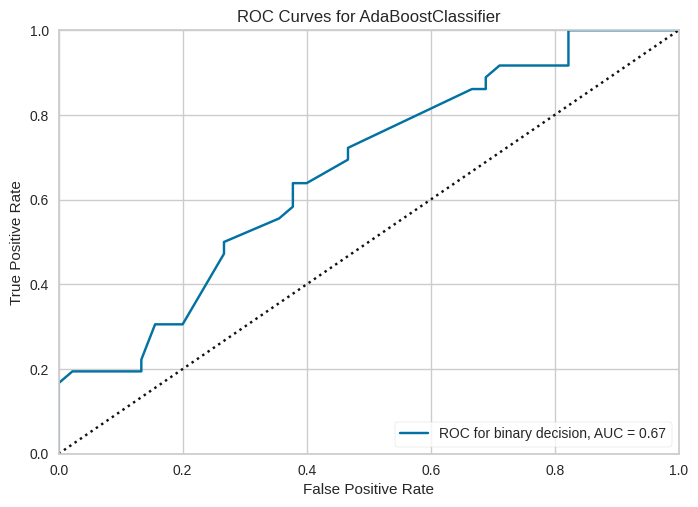

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [16]:
vis = ROCAUC(grid_search_ada.best_estimator_, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()